## Documenting Error Loading Tau_x from KDS75_wp2

In [17]:
# Load modules
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # plot on map projections
import seaborn as sns

from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
from mpl_toolkits.basemap import Basemap # plot on map projections
import xarray as xr
import os # operating system interface

In [3]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [4]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 42083:127.0.0.1:42083 vdi-n6.nci.org.au -l pas561


Client Scheduler: tcp://127.0.0.1:35184 Dashboard: http://127.0.0.1:42083,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [5]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)
#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [6]:
cc.build_index()

Files found but not yet indexed: 0
No new .nc files found.


True

In [7]:
configuration = 'mom01v5'
expts = cc.get_experiments(configuration)
display(expts)


['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

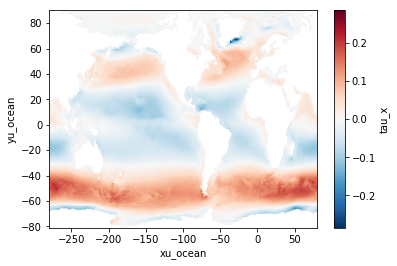

In [8]:
#this works, loading tau_x from the control experiment
expt='kds75_cp'
tau_x= cc.get_nc_variable(expt,
                    'ocean.nc',
                    'tau_x',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
mean_tau_x = tau_x.sel(time='1975').mean('time').load()
mean_tau_x.plot.pcolormesh()

In [10]:
#this fails, loading tau_x from the control experiment
# I don't understand why
expt='kds75_wp2'
tau_x= cc.get_nc_variable(expt,
                    'ocean.nc',
                    'tau_x',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
mean_tau_x = tau_x.sel(time='1975').mean('time').load()
mean_tau_x.plot.pcolormesh()

KeyError: 'geolat_c'

In [13]:
#loading MLD also fails from the same ocean.nc file
expt='kds75_wp2'
mld= cc.get_nc_variable(expt,
                    'ocean.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
mean_mld = tau_x.sel(time='1975').mean('time').load()
mean_mld.plot.pcolormesh()

KeyError: 'geolon_t'

In [19]:
#This method works fine ... though I get a memory error if I use output* instead of output4*
NYFCntrlDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/'
Ocean_File = os.path.join(NYFCntrlDir,'output4*/ocean.nc')
print(Ocean_File)
cntrl=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print(cntrl.tau_x.shape)


/g/data3/hh5/tmp/cosima/mom01v5/kds75_cp/output4*/ocean.nc
(57, 2700, 3600)


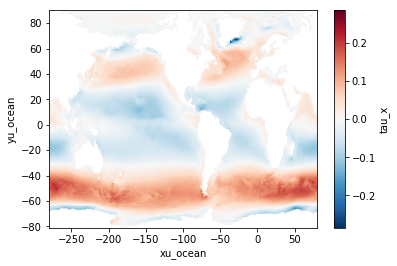

In [14]:
#loading mld from ocean_month.nc works fine
expt='kds75_wp2'
mld= cc.get_nc_variable(expt,
                    'ocean_month.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
mean_mld = tau_x.sel(time='1975').mean('time').load()
mean_mld.plot.pcolormesh()